In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import cv2
import matplotlib
import matplotlib.pyplot as plt
# from conversion import convert_to_3_stroke
from face_data import load_faces
from tqdm import tqdm
from svg_util import draw_strokes, make_grid_svg
from neuralnet import load_trained_classifier
from neuralnet.sketch_rnn_class import predict_model, pred

load the classifier

In [2]:
sess, eval_model, test_set = load_trained_classifier()

loading datasets...
INFO:tensorflow:Loaded 70000/2500/2500 from ear.npz
INFO:tensorflow:Loaded 70000/2500/2500 from eye.npz
INFO:tensorflow:Loaded 70000/2500/2500 from mouth.npz
INFO:tensorflow:Loaded 70000/2500/2500 from nose.npz
INFO:tensorflow:Dataset combined: 300000 (280000/10000/10000), avg len 37
INFO:tensorflow:model_params.max_seq_len 125.
total images <= max_seq_len is 280000
total images <= max_seq_len is 10000
total images <= max_seq_len is 10000
INFO:tensorflow:normalizing_scale_factor 45.8033.
loaded datasets.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model neuralnet/checkpoint_path/classifier/vector-50000.
INFO:tensorflow:Restoring parameters from neuralnet/checkpoint_path/classifier/vector-50000


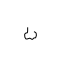

In [3]:
stroke = test_set.random_sample()
draw_strokes(stroke)
# print stroke

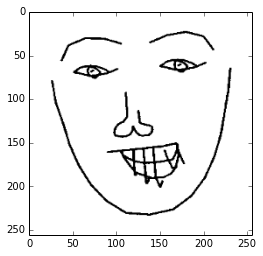

In [4]:
im = cv2.imread('example_1.png', 0)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

**Method 1: sliding window**
- slide a small window across the image
- for each window, convert to 3-stroke format
- classify as a eye, nose, mouth

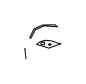

[[  0.163  -1.19    0.443   4.556 -15.257 -15.342 -15.033 -14.992 -15.165 -14.882 -14.922 -15.161 -15.078 -14.97  -14.62  -15.232]]


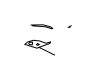

[[ -0.609   0.372   4.439  -1.221 -13.373 -13.202 -12.864 -12.991 -13.059 -12.714 -13.191 -13.269 -13.328 -12.915 -12.924 -13.152]]


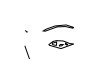

[[ -0.397   3.739   0.293  -0.129 -13.451 -13.396 -13.066 -12.982 -13.319 -13.104 -13.214 -13.223 -12.955 -12.932 -12.748 -13.175]]


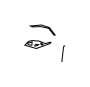

[[ 7.972e-01  8.112e-01 -1.471e-03  2.713e+00 -1.622e+01 -1.619e+01 -1.571e+01 -1.598e+01 -1.610e+01 -1.624e+01 -1.586e+01 -1.644e+01 -1.675e+01 -1.637e+01 -1.619e+01 -1.624e+01]]


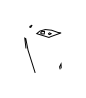

[[  0.346  -0.216   2.071   2.497 -14.202 -14.181 -14.239 -14.572 -14.247 -14.238 -14.302 -14.475 -14.775 -14.699 -14.472 -14.155]]


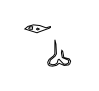

[[  0.159   0.118   1.289   2.568 -14.74  -14.621 -14.814 -14.603 -14.675 -14.432 -14.33  -14.769 -14.332 -14.278 -14.264 -14.579]]


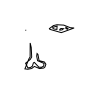

[[  0.037  -0.302   2.128   2.387 -14.706 -14.551 -14.76  -14.767 -14.689 -14.415 -14.243 -14.816 -14.427 -14.197 -14.313 -14.54 ]]


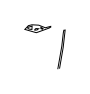

[[ -0.419  -1.347  -0.373   7.241 -14.281 -13.715 -14.127 -14.355 -14.308 -14.026 -14.117 -14.56  -14.163 -14.477 -14.283 -14.07 ]]


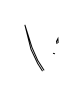

[[  1.344  -3.243   0.781   4.999 -12.031 -11.551 -12.03  -12.215 -11.911 -11.727 -11.982 -11.92  -12.193 -11.945 -12.049 -11.163]]


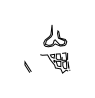

[[-3.019  5.415  4.983 -4.458 -8.308 -8.627 -8.056 -8.454 -7.881 -8.034 -8.669 -8.562 -8.756 -8.46  -8.219 -7.526]]


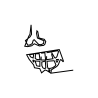

[[ -2.515   4.253   4.48   -3.021  -9.796  -9.847  -9.1   -10.032  -9.303  -9.622  -9.844  -9.658  -9.955  -9.554  -9.465  -8.747]]


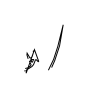

[[  0.196   0.022   0.778   4.286 -14.454 -13.335 -14.18  -14.548 -14.2   -13.81  -14.054 -14.914 -14.034 -14.193 -14.129 -14.14 ]]


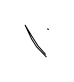

[[  2.564  -3.717   0.248   3.345 -10.786 -10.534 -10.873 -11.182 -10.559 -10.506 -10.571 -11.094 -10.948 -10.453 -10.631 -10.122]]


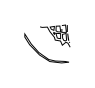

[[ -0.096   3.17    3.803  -4.345 -10.216 -10.301  -9.859 -10.451 -10.081  -9.762 -10.55  -10.426 -10.143  -9.899  -9.838  -9.855]]


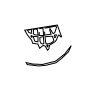

[[ -2.968   6.123   3.11   -2.487 -10.245  -9.329  -9.521 -10.328  -9.733  -9.534  -9.559  -9.883 -10.018  -9.793 -10.005  -9.833]]


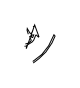

[[  0.63    1.318   0.994   1.492 -14.824 -14.057 -14.589 -14.883 -14.55  -14.085 -14.631 -14.917 -14.183 -14.449 -14.375 -14.681]]


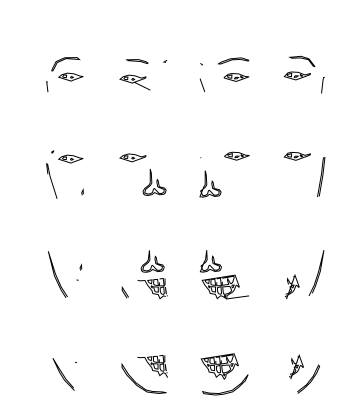

In [53]:
import conversion
conversion = reload(conversion)
from conversion import get_curves, get_window_3_stroke
lines = get_curves(im)

window_size = 100
shift_size = 50
scale_factor = 10
H, W = im.shape
strokes = []
count = 0
for x, j in enumerate(range(0, H-window_size, shift_size)):
    for y, i in enumerate(range(0, W-window_size, shift_size)):
        stroke = get_window_3_stroke(lines, im, j, i, window_size=window_size)
        stroke[:,0:2] /= scale_factor
        stroke[0] = [0,0,0]
        p = pred(sess, eval_model, stroke, 125)
        
        draw_strokes(stroke)
        print p
        strokes.append([stroke, [x, y]])

grid = make_grid_svg(strokes, grid_space=20.0)
draw_strokes(grid)

# stroke = get_window_3_stroke(lines, im, 0, 0, window_size=50)
# normalize stroke by dividing by normalizing scale factor
# scale_factor = 1 #20 # 45.8033
# stroke[:, 0:2] /= scale_factor
# print len(strokes)
# print stroke
# print np.min(stroke), np.max(stroke)
# draw_strokes(stroke)